# 텍스트 마이닝
## koLNpy import

In [1]:
import konlpy
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
text = open('모란이피기까지는.txt', encoding='UTF-8').read()
text

'모란이 피기까지는\n나는 아직 나의 봄을 기다리고 있을테요\n모란이 뚝뚝 떨어져버린날\n나는 비로소 봄을 여읜 슬픔에 잠길테요\n오월 어느날 그 하루 무덥던 날\n떨어져 누군 꽃잎마저 시들어 버리고는\n천지에 모란은 자취도 없어지고\n뻗쳐오르던 내 보람 서운케 무너졌느니\n모란이 지고 말면 그 뿐, 내 한해는 다가고 말아\n삼백 예순날 마냥 서럽게 우옵내다\n모란이 피기까지는\n나는 아직 기다리고 있을테요, 찬란한 슬픔의 봄을'

In [3]:
# 한글이 아닌 모든 문자를 공백으로 변환
clean_text = re.sub('[^가-힣]', ' ', text)
clean_text

'모란이 피기까지는 나는 아직 나의 봄을 기다리고 있을테요 모란이 뚝뚝 떨어져버린날 나는 비로소 봄을 여읜 슬픔에 잠길테요 오월 어느날 그 하루 무덥던 날 떨어져 누군 꽃잎마저 시들어 버리고는 천지에 모란은 자취도 없어지고 뻗쳐오르던 내 보람 서운케 무너졌느니 모란이 지고 말면 그 뿐  내 한해는 다가고 말아 삼백 예순날 마냥 서럽게 우옵내다 모란이 피기까지는 나는 아직 기다리고 있을테요  찬란한 슬픔의 봄을'

In [4]:
# 명사 추출
nouns = konlpy.tag.Hannanum().nouns(clean_text)
nouns

['모란',
 '피',
 '나',
 '나',
 '있을테요',
 '모란',
 '떨어져버린날',
 '나',
 '잠길테요',
 '오월',
 '어느날',
 '하루',
 '날',
 '누',
 '꽃잎',
 '천지',
 '모란',
 '자취',
 '뻗쳐오르',
 '내',
 '보람',
 '서운케',
 '모란',
 '뿐',
 '내',
 '한해',
 '다가',
 '삼백',
 '예순날',
 '우옵내다',
 '모란',
 '피',
 '나',
 '있을테요',
 '찬란한',
 '슬픔',
 '봄을']

In [5]:
# DataFrame으로 변환
df_words = pd.DataFrame({'word': nouns})
df_words.head()

,word
0,모란
1,피
2,나
3,나
4,있을테요


In [6]:
# 2글자 이하인 단어 삭제
df_words['count'] = df_words['word'].str.len()
df_words = df_words[(df_words['count'] >= 2)]
# query() 메소드 사용
#df_words = df_words.query('count >= 2')

# count 컬럼을 1로 수정
df_words['count'] = 1
df_words

,word,count
0,모란,1
4,있을테요,1
5,모란,1
6,떨어져버린날,1
8,잠길테요,1
9,오월,1
10,어느날,1
11,하루,1
14,꽃잎,1
15,천지,1


In [7]:
# groupby로 집계
df_wc = df_words.groupby(by='word',as_index=False).agg(count=('word','count')).sort_values('count', ascending=False)
df_wc

,word,count
3,모란,5
14,있을테요,2
0,꽃잎,1
11,예순날,1
19,하루,1
18,천지,1
17,찬란한,1
16,잠길테요,1
15,자취,1
13,우옵내다,1


<AxesSubplot:xlabel='count', ylabel='word'>

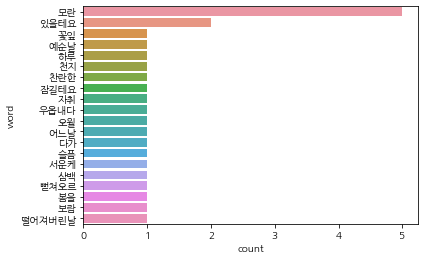

In [8]:
sns.barplot(data=df_wc.head(20),y='word',x='count')

In [9]:
# wordcloud
dic_word = df_wc.set_index('word').to_dict()['count']
dic_word

{'모란': 5,
 '있을테요': 2,
 '꽃잎': 1,
 '예순날': 1,
 '하루': 1,
 '천지': 1,
 '찬란한': 1,
 '잠길테요': 1,
 '자취': 1,
 '우옵내다': 1,
 '오월': 1,
 '어느날': 1,
 '다가': 1,
 '슬픔': 1,
 '서운케': 1,
 '삼백': 1,
 '뻗쳐오르': 1,
 '봄을': 1,
 '보람': 1,
 '떨어져버린날': 1,
 '한해': 1}

In [10]:
from wordcloud import WordCloud
font = 'NanumGothic'

In [11]:
wc = WordCloud(random_state=1234,   #난수 고정
               font_path=font,
               width=400,
               height=400,
               background_color='white'
               )

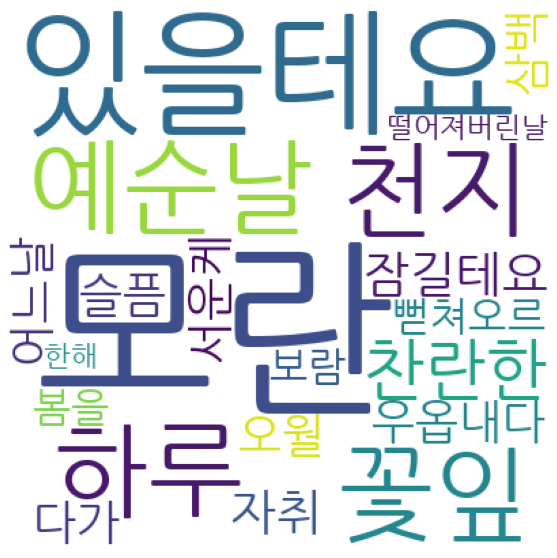

In [12]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_wordcloud)